In [3]:
import numpy as np
from scipy.ndimage import binary_dilation

from dipy.core.gradients import gradient_table
from dipy.data import get_fnames
from dipy.io.gradients import read_bvals_bvecs
from dipy.io.image import load_nifti_data, load_nifti, save_nifti
from dipy.direction import peaks
from dipy.reconst import shm
from dipy.tracking import utils
from dipy.tracking.local_tracking import LocalTracking
from dipy.tracking.stopping_criterion import BinaryStoppingCriterion
from dipy.tracking.streamline import Streamlines

In [4]:
# files

In [5]:
##### file paths
fidwi  = 'stanford_hardi/HARDI150.nii.gz'
fbval  = 'stanford_hardi/HARDI150.bval'
fbvec  = 'stanford_hardi/HARDI150.bvec'
filab  = 'stanford_hardi/aparc-reduced.nii.gz'
fit1w  = 'stanford_hardi/t1.nii.gz'

In [6]:
data, affine, hardi_img = load_nifti(fidwi, return_img=True)
labels = load_nifti_data(filab)
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
gtab = gradient_table(bvals, bvecs)

t1_data = load_nifti_data(fit1w)

In [7]:
white_matter = binary_dilation((labels == 1) | (labels == 2))
csamodel = shm.CsaOdfModel(gtab, 6)
csapeaks = peaks.peaks_from_model(model=csamodel, data=data,   sphere=peaks.default_sphere, relative_peak_threshold=.8, min_separation_angle=45, mask=white_matter)

In [9]:
white_matter.shape

(81, 106, 76)

In [10]:
affine = np.eye(4)
seeds = utils.seeds_from_mask(white_matter, affine, density=1)
stopping_criterion = BinaryStoppingCriterion(white_matter)

streamline_generator = LocalTracking(csapeaks, stopping_criterion, seeds,affine=affine, step_size=0.5)
streamlines = Streamlines(streamline_generator)

In [29]:
streamlines

ArraySequence([array([[ 6.56012737, 42.02806284, 29.76393953],
       [ 7.        , 42.        , 30.        ],
       [ 7.43987263, 41.97193716, 30.23606047]]), array([[ 6.58686628, 43.21410825, 29.81702956],
       [ 7.        , 43.        , 30.        ],
       [ 7.41313372, 42.78589175, 30.18297044]]), array([[ 7.07571096, 43.49145424, 29.94764947],
       [ 7.        , 43.        , 30.        ],
       [ 6.92428904, 42.50854576, 30.05235053]]), ..., array([[72.48054077, 55.10821475, 37.91415048],
       [72.        , 55.        , 38.        ],
       [71.51945923, 54.89178525, 38.08584952],
       [71.08420371, 54.80155955, 38.31478609],
       [70.70196121, 54.70760707, 38.62310995],
       [70.33109661, 54.55687572, 38.92267548],
       [69.99895749, 54.33644519, 39.22449328],
       [69.70783638, 54.09108541, 39.54860295],
       [69.31287898, 54.00442717, 39.84271008],
       [68.86758026, 54.01353298, 40.06992392],
       [68.4049071 , 53.97044147, 40.2545226 ],
       [67.946

In [30]:
cc_slice = labels == 1

# cc_slice = labels == 2
cc_streamlines = utils.target(streamlines, affine, cc_slice)
cc_streamlines = Streamlines(cc_streamlines)

other_streamlines = utils.target(streamlines, affine, cc_slice, include=False)
other_streamlines = Streamlines(other_streamlines)
assert len(other_streamlines) + len(cc_streamlines) == len(streamlines)

KeyboardInterrupt: 

In [15]:
interactive = True

In [28]:
other_streamlines

ArraySequence([array([[ 6.56012737, 42.02806284, 29.76393953],
       [ 7.        , 42.        , 30.        ],
       [ 7.43987263, 41.97193716, 30.23606047]]), array([[ 6.58686628, 43.21410825, 29.81702956],
       [ 7.        , 43.        , 30.        ],
       [ 7.41313372, 42.78589175, 30.18297044]]), array([[ 7.07571096, 43.49145424, 29.94764947],
       [ 7.        , 43.        , 30.        ],
       [ 6.92428904, 42.50854576, 30.05235053]]), ..., array([[71.83809418, 50.47106558, 27.95659808],
       [72.        , 50.        , 28.        ],
       [72.16190582, 49.52893442, 28.04340192],
       [72.23406881, 49.03749771, 27.98610912],
       [72.2062642 , 48.56406093, 27.8277282 ],
       [72.19403096, 48.08567828, 27.68281309],
       [72.20688317, 47.60093729, 27.56090742]]), array([[71.89902413, 50.48915127, 31.97687197],
       [72.        , 50.        , 32.        ],
       [72.10097587, 49.51084873, 32.02312803],
       [72.17628184, 49.01666954, 32.03389575],
       [72.2

In [16]:
# from dipy.viz import window, actor, colormap as cmap

# # Enables/disables interactive visualization
# # interactive = False

# # Make display objects
# color = cmap.line_colors(cc_streamlines)
# cc_streamlines_actor = actor.line(cc_streamlines,  cmap.line_colors(cc_streamlines))
# cc_ROI_actor = actor.contour_from_roi(cc_slice, color=(1., 1., 0.), opacity=0.5)

# # vol_actor = actor.slicer(t1_data)

# # vol_actor.display(x=40)
# # vol_actor2 = vol_actor.copy()
# # vol_actor2.display(z=35)

# # Add display objects to canvas
# scene = window.Scene()
# # scene.add(vol_actor)
# # scene.add(vol_actor2)
# scene.add(cc_streamlines_actor)
# scene.add(cc_ROI_actor)

# # Save figures
# # window.record(scene, n_frames=1, out_path='corpuscallosum_axial.png', size=(800, 800))

# # if interactive:
# #     window.show(scene)
# scene.set_camera(position=[-1, 0, 0], focal_point=[0, 0, 0], view_up=[0, 0, 1])
# # window.record(scene, n_frames=1, out_path='corpuscallosum_sagittal.png', size=(800, 800))
# # if interactive:
# #     window.show(scene)
# window.show(scene)

In [17]:
M, grouping = utils.connectivity_matrix(cc_streamlines, affine,labels.astype(np.uint8), return_mapping=True, mapping_as_streamlines=True)

In [18]:
M.shape

(89, 89)

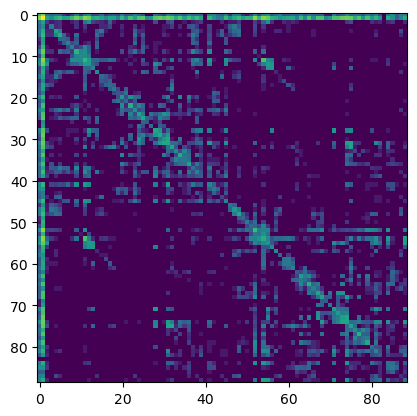

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.log1p(M), interpolation='nearest') 

In [20]:
##### the first 3 rows and colums are L WM , R WM and white matter intensities so we remove them.

M_copy = M.copy()

In [21]:
M_copy[:3, :] = 0
M_copy[:, :3] = 0

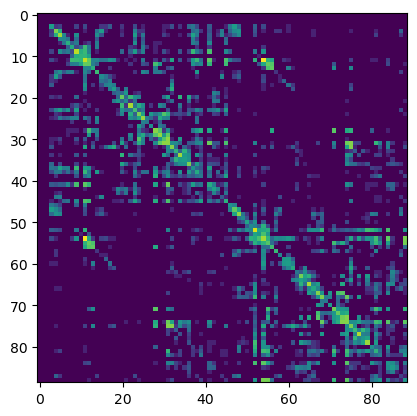

In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.log1p(M_copy), interpolation='nearest') 

In [15]:
np.save('connectivity_M_log.npy',np.log1p(M_copy) )

In [16]:
import pandas as pd

In [17]:
Mdf = DF = pd.DataFrame(np.log1p(M_copy))

In [19]:
Mdf.to_csv('M_connectivity.csv', header=False, index=False)

In [ ]:
########################################################################

In [39]:
lr_superiorfrontal_track = grouping[11, 54]
shape = labels.shape
dm = utils.density_map(lr_superiorfrontal_track, affine, shape)

In [40]:
from dipy.io.stateful_tractogram import Space, StatefulTractogram
from dipy.io.streamline import save_trk

In [41]:
# Save density map
save_nifti("lr-superiorfrontal-dm.nii.gz", dm.astype("int16"), affine)

lr_sf_trk = Streamlines(lr_superiorfrontal_track)

# Save streamlines
sft = StatefulTractogram(lr_sf_trk, hardi_img, Space.VOX)
save_trk(sft, "lr-superiorfrontal.trk")

In [42]:
############## path length - continues after cell #5

In [45]:
# # Make a corpus callosum seed mask for tracking
# seed_mask = labels == 1
# seeds = utils.seeds_from_mask(seed_mask, affine, density=[1, 1, 1])

# # Make a streamline bundle model of the corpus callosum ROI connectivity
# streamlines = LocalTracking(csa_peaks, stopping_criterion, seeds, affine,step_size=2)
# streamlines = Streamlines(streamlines)